In [1]:
# !pip install fitz

## Data preprocessing


In [1]:
import numpy as np
import pandas as pd

In [3]:
# prompt: write a code loop through each pdf file and extract the text from here and save in csv "/content/drive/MyDrive/CVs1"

import pandas as pd
!pip install PyMuPDF
import fitz # PyMuPDF
import os

# Mount Google Drive if not already mounted
try:
  from google.colab import drive
  drive.mount('/content/drive')
except:
  pass

pdf_folder_path = "/content/drive/MyDrive/CVs1"
output_csv_path = "/content/drive/MyDrive/extracted_text.csv"

# Create a list to store the extracted text and filenames
extracted_data = []

# Check if the folder exists
if not os.path.exists(pdf_folder_path):
  print(f"Error: Folder '{pdf_folder_path}' not found.")
else:
  # Loop through each file in the folder
  for filename in os.listdir(pdf_folder_path):
    if filename.endswith(".pdf"):
      pdf_path = os.path.join(pdf_folder_path, filename)
      try:
        # Open the PDF file
        doc = fitz.open(pdf_path)
        text = ""
        # Extract text from each page
        for page_num in range(doc.page_count):
          page = doc.load_page(page_num)
          text += page.get_text()

        # Append the filename and extracted text to the list
        extracted_data.append({'Filename': filename, 'Text': text})

        # Close the document
        doc.close()

      except Exception as e:
        print(f"Error processing {filename}: {e}")

  # Create a pandas DataFrame from the extracted data
  df = pd.DataFrame(extracted_data)

  # Save the DataFrame to a CSV file
  try:
    df.to_csv(output_csv_path, index=False)
    print(f"Successfully extracted text from PDFs and saved to {output_csv_path}")
  except Exception as e:
    print(f"Error saving data to CSV: {e}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 89.7 MB/s eta 0:00:00
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Successfully extracted text from PDFs and saved to /content/drive/MyDrive/extracted_text.csv


In [8]:
# prompt: /content/job_description.csv   use this (Job Title	Job Description) and the extracted text , create a new csv the should have shuffle of each resume with each title + job description , and create another column label empty

import pandas as pd
import numpy as np
# Load the job descriptions CSV
job_desc_df = pd.read_csv('/content/job_description.csv', encoding='ISO-8859-1')

In [9]:
job_desc_df.head()

,Job Title,Job Description,Unnamed: 2
0,Software Engineer,Description:\nWe are seeking a skilled Softwa...,
1,Data Scientist,Job Description:\nWe are looking for a skilled...,NaN
2,Product Manager,Description:\nWe are seeking an innovative and...,NaN
3,Cloud Engineer,Description:\nWe are looking for a skilled Clo...,NaN
4,Cybersecurity Analyst,Description:\nWe are looking for a skilled Cyb...,NaN


In [19]:
import pandas as pd
import numpy as np
from itertools import product

# Rename columns for consistency
resumes_df = df.rename(columns={'Filename': 'Resume Filename', 'Text': 'Resume Text'})

# Generate all combinations (resume x job description)
combinations = list(product(
    resumes_df[['Resume Filename', 'Resume Text']].to_dict(orient='records'),
    job_desc_df[['Job Title', 'Job Description']].to_dict(orient='records')
))

# Build the new dataset with only the required fields
shuffled_data = [
    {
        'Resume Text': resume['Resume Text'],
        'Job': f"Job Role: {job['Job Title']}\nDescription: {job['Job Description']}",
        'Label': ''  # Empty placeholder
    }
    for resume, job in combinations
]

# Convert to DataFrame and shuffle
shuffled_df = pd.DataFrame(shuffled_data)
shuffled_df = shuffled_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Save the result
output_path = "/content/drive/MyDrive/shuffled_resume_job_combinations_clean.csv"
try:
    shuffled_df.to_csv(output_path, index=False)
    print(f"Saved clean shuffled combinations to {output_path}")
except Exception as e:
    print(f"Error saving CSV: {e}")


Saved clean shuffled combinations to /content/drive/MyDrive/shuffled_resume_job_combinations_clean.csv


In [20]:
shuffled_df.head()

,Resume Text,Job,Label
0,Candidate Resume (ID: C3014)\nName: David Will...,Job Role: Business Intelligence Analyst\nDescr...,
1,Candidate Resume (ID: C9533)\nName: Katie Burn...,Job Role: Network Engineer\nDescription: Descr...,
2,Candidate Resume (ID: C3142)\nName: Lisa Gibbs...,Job Role: Full Stack Developer\nDescription: D...,
3,Candidate Resume (ID: C8398)\nName: Robert Ran...,Job Role: Machine Learning Engineer\nDescripti...,
4,Candidate Resume (ID: C7554)\nName: Amanda Mil...,Job Role: AI Researcher\nDescription: Descript...,


In [15]:
shuffled_df['Job'] = "Job Role : "+shuffled_df['Job Title'] + ' ' + shuffled_df['Job Description']

In [16]:
shuffled_df.head()

,Resume Filename,Resume Text,Job Title,Job Description,Label,Job
0,C9677.pdf,Candidate Resume (ID: C9677)\nName: Andrew Slo...,Blockchain Developer,"Description:\nDesign, develop, and maintain bl...",,Job Role : Blockchain Developer Description:\n...
1,C3899.pdf,Candidate Resume (ID: C3899)\nName: Oscar Perr...,Network Engineer,Description:\nWe are looking for a skilled Net...,,Job Role : Network Engineer Description:\nWe a...
2,C2603.pdf,Candidate Resume (ID: C2603)\nName: Charles Ga...,Business Intelligence Analyst,Description:\nAnalyze business data to identif...,,Job Role : Business Intelligence Analyst Descr...
3,C8692.pdf,Candidate Resume (ID: C8692)\nName: Corey Murp...,Machine Learning Engineer,Description:\nWe are looking for a skilled Mac...,,Job Role : Machine Learning Engineer Descripti...
4,C2775.pdf,Candidate Resume (ID: C2775)\nName: Sydney Jon...,Robotics Engineer,Description:\nWe are seeking an innovative Rob...,,Job Role : Robotics Engineer Description:\nWe ...


# Data preparing

In [2]:
input_path = "/content/drive/MyDrive/shuffled_resume_job_labeled.csv"
dataset = pd.read_csv(input_path, encoding='ISO-8859-1')

In [3]:
dataset.head()

,Resume Text,Job,Label
0,Candidate Resume (ID: C3014)\nName: David Will...,Job Role: Business Intelligence Analyst\nDescr...,0.069261
1,Candidate Resume (ID: C9533)\nName: Katie Burn...,Job Role: Network Engineer\nDescription: Descr...,0.089117
2,Candidate Resume (ID: C3142)\nName: Lisa Gibbs...,Job Role: Full Stack Developer\nDescription: D...,0.028587
3,Candidate Resume (ID: C8398)\nName: Robert Ran...,Job Role: Machine Learning Engineer\nDescripti...,0.146968
4,Candidate Resume (ID: C7554)\nName: Amanda Mil...,Job Role: AI Researcher\nDescription: Descript...,0.183906


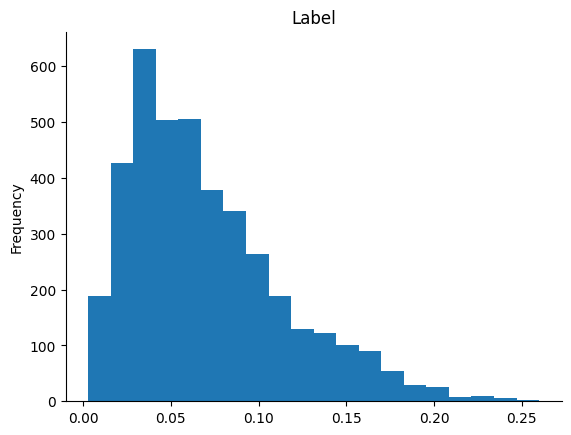

In [4]:
# @title Label

from matplotlib import pyplot as plt
dataset['Label'].plot(kind='hist', bins=20, title='Label')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [8]:
from sentence_transformers import InputExample


raw_data = []
for row in dataset.itertuples(index=True):
  raw_data.append(InputExample(texts=[row._1, row.Job], label=row.Label))

In [9]:
raw_data[0]

In [10]:
from sentence_transformers import SentenceTransformer, losses, models

model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [11]:
from torch.utils.data import DataLoader
from sentence_transformers import losses

train_dataloader = DataLoader(raw_data, shuffle=True, batch_size=16)
train_loss = losses.CosineSimilarityLoss(model=model)

In [12]:
model.fit(
    train_objectives=[(train_dataloader, train_loss)],
    epochs=3,
    warmup_steps=100
)

/usr/local/lib/python3.11/dist-packages/datasets/table.py:1395: FutureWarning: promote has been superseded by promote_options='default'.
  block_group = [InMemoryTable(cls._concat_blocks(list(block_group), axis=axis))]
/usr/local/lib/python3.11/dist-packages/datasets/table.py:1421: FutureWarning: promote has been superseded by promote_options='default'.
  table = cls._concat_blocks(blocks, axis=0)


Computing widget examples:   0%|          | 0/1 [00:00<?, ?example/s]

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: rohitcode005 (rohitcode005-sarala-birla-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss
500,0.006500


In [13]:
model.save("output/resume_job_model/")

In [14]:
new_model = SentenceTransformer("output/resume_job_model/")

In [18]:
resume = "Python, ML, AWS"
job = "Hiring backend developer with ML knowledge"

emb1 = model.encode(resume, normalize_embeddings=True)
emb2 = model.encode(job, normalize_embeddings=True)

from numpy import dot
similarity = dot(emb1, emb2)  # Cosine similarity
similarity

np.float32(0.25283664)

In [20]:
resume = "Python, ML, AWS"
job = "Hiring backend developer with ML knowledge"

emb1 = new_model.encode(resume, normalize_embeddings=True)
emb2 = new_model.encode(job, normalize_embeddings=True)

from numpy import dot
similarity = dot(emb1, emb2)  # Cosine similarity
similarity

np.float32(0.25283664)